In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("static/data.csv")

In [3]:
df.drop(columns=["datelisted"], inplace=True)
df.drop_duplicates(subset="propertyid", keep="first", inplace=True)
df["price"] = df["price"].fillna(df["price"].mean())
df["squarefeet"] = df["squarefeet"].fillna(df["squarefeet"].mean())
df["bedrooms"] = df["bedrooms"].fillna(df["bedrooms"].mean())
df["bathrooms"] = df["bathrooms"].fillna(df["bathrooms"].mean())

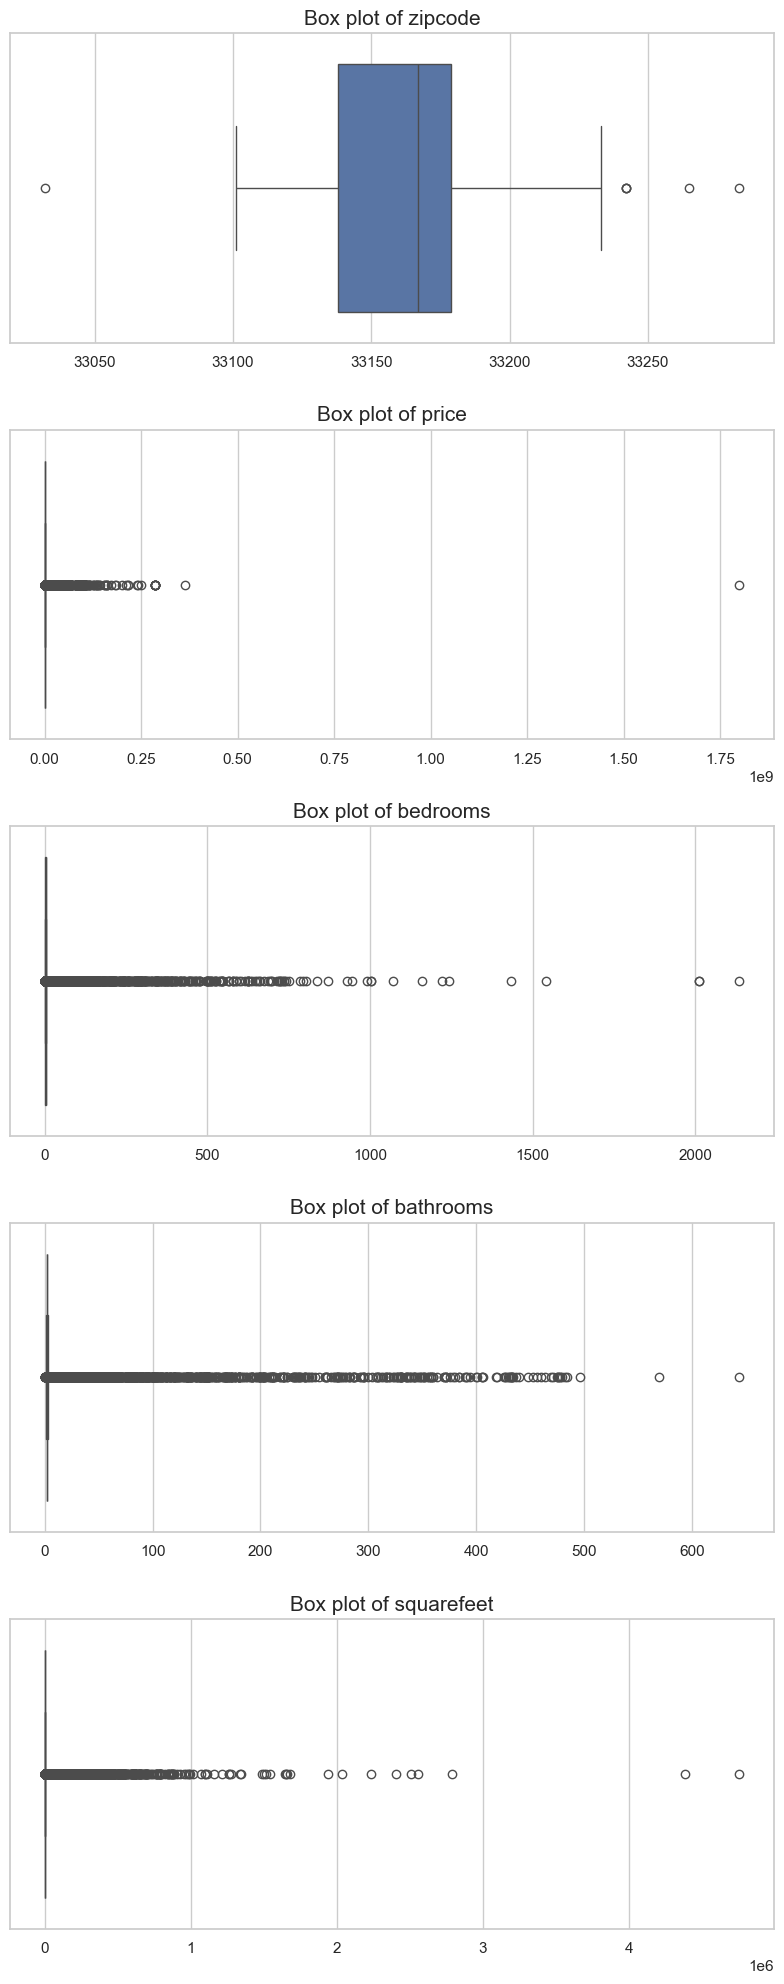

In [4]:
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=["propertyid"])

# Set the style of seaborn for better visuals
sns.set_theme(style="whitegrid")

# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=len(numeric_df.columns), figsize=(8, len(numeric_df.columns)*4))

# Check if there's only one numeric column, handle the subplot differently
if len(numeric_df.columns) == 1:
    sns.boxplot(x=numeric_df[numeric_df.columns[0]])
    plt.title(f'Box plot of {numeric_df.columns[0]}', fontsize=15)
else:
    # Iterate over each numeric column and create a boxplot for each one
    for i, column in enumerate(numeric_df.columns):
        sns.boxplot(x=numeric_df[column], ax=axs[i])
        axs[i].set_title(f'Box plot of {column}', fontsize=15)
        axs[i].set_xlabel('')

plt.tight_layout()
plt.show()